<a href="https://colab.research.google.com/github/SLCFLAB/Fintech2025/blob/main/DL_day11/2_HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Language Modelling

In [9]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
!pip install datasets
from datasets import load_dataset
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
# GPT-2 모델과 토크나이저 로드
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

input_text = "The future of AI is"

# 텍스트를 토크나이저를 통해 토큰화
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# 모델을 사용하여 텍스트 생성
with torch.no_grad():
    outputs = model.generate(input_ids, max_length=50, num_return_sequences=1, no_repeat_ngram_size=2, top_k=50, top_p=0.95, temperature=1.0)

# 생성된 텍스트 디코딩
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Generated Text: {generated_text}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Text: The future of AI is uncertain. The future is not yet clear. But it is certainly possible that AI will be able to solve many of the problems that we face today.

The Future of Artificial Intelligence
. . .
 (1)


# IMDb 데이터셋을 활용한 sentiment analysis

- 이 실습에서는 Hugging Face의 `transformers` 라이브러리와 `datasets` 라이브러리를 사용하여, IMDb 영화 리뷰 데이터셋을 분석하고, 텍스트의 감성(긍정/부정)을 예측하는 작업을 합니다.
- 또한, 감성 분석 결과를 시각화하여 긍정적 및 부정적 리뷰의 분포를 시각적으로 확인할 수 있습니다.
- 예측된 sentiment 값은 0 (부정) 또는 1 (긍정)입니다.

- DistilBERT 모델과 토크나이저를 로드합니다.
  - DistilBERT는 BERT 모델의 경량화된 버전

In [4]:
dataset = load_dataset("imdb")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")


train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [8]:
dataset['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [10]:
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=512)

train_dataset = dataset['train'].map(preprocess_function, batched=True)
test_dataset = dataset['test'].map(preprocess_function, batched=True)

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        logits = model(**inputs).logits
    prediction = torch.argmax(logits, dim=-1)
    return prediction.item()

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [11]:
sample_text = "I love this movie! It was absolutely amazing."
sentiment = predict_sentiment(sample_text)
print(f"Sentiment for the sample text: {'Positive' if sentiment == 1 else 'Negative'}")

Sentiment for the sample text: Negative


In [20]:
sum(test_dataset['label']) / len(test_dataset['label'])

0.5

In [21]:
num_samples = 200

sample_indices = random.sample(range(len(test_dataset['text'])), num_samples)
sample_texts = [test_dataset['text'][i] for i in sample_indices]
sample_labels = [test_dataset['label'][i] for i in sample_indices]

pd.set_option('display.max_colwidth', None)
df = pd.DataFrame({'text': sample_texts, 'label': sample_labels})
df

,text,label
0,"Hercules the Avenger is by far the best single entry in the muscleman genre I can recall. The charge against it made by critics - it is a cut and paste of two previous Hercules films, with some added new material to make it appear fresh - misses the fact that this cut-and-paste approach solves one of the central problems of the sword-and-sandal movies. With most of these films, the middle third sags horribly - usually involving a sappy love story or arcane political intrigue or both (queen falls in love with Hercules and her evil brother plots against them, etc.) It's often hard to hold on through this to watch the exciting finale. Hercules the Avenger cuts all that crap from the source films, and adds a rather brisk narrative of a Hercules impersonator bullying his way into power. (It should be noted that this episode also functions as a distant but pointedly critical remark on the rise of Fascism in Italy.) This also sets up a fine final wrasslin' match between the real Hercules and his impersonator.<br /><br />In a narrower focus, I might also add that further editing has improved individual scenes borrowed from the other films. For my money, the mutiny scene here is much better than it first appeared in Hercules and the Captive Women, since it has been tightened with the reduction of several characters and their plot complications.<br /><br />There are also floppy monsters, creepy underworld atmospherics borrowed (literally) from Mario Bava, an entire city destroyed, and the usual amount of lovely babes in revealing gowns. Since no one expects any of these films to compete with The Seven Samurai - or even with The Magnificent Seven - it seems a bit picky to hold the film's borrowing from other films against it.",1
1,"In my opinion dads army is thee best British sitcom of all time. I believe that if you just watch one episode of the show you cannot judge in completely on that one episode, (this include the movie) You must at least watch a series of this show, get inside the characters, become familiar with there surroundings and the situations which they are in. When you become familiar with the show then it will start appealing to you. Now the movie has a few changes to the series which is slightly disappointing, but it still works. Watch a series or two of the show first before you watch this. You'll not be disappointed. Good episode to watch is ""No Spring for Frazer""",1
2,"We found this movie nearly impossible to watch. With such a super cast, it's a shame that the writing and direction were so awful. The excruciating pace at which the story was told was maddening. The flash-backs were clumsy. The characters were one-dimensional. The heavy-handed metaphors -- the river, the cat -- were repeated way too often. <br /><br />The movie Nobody's Fool, based on another novel by Russo, was infinitely better, probably because it was more tightly written and directed. <br /><br />The photography in Empire Falls was lovely. Too bad it wasn't a travelogue.<br /><br />I read the novel and enjoyed the writing style but had some quibbles with the novel itself. I would give the novel 4 out of 5 stars. Perhaps the screenwriters and director were so awed by the novel's reputation they felt they had to include every darn thing in their movie. This was supposed to be a television movie, guys, not Books on Tape.",0
3,"I saw the movie while I was in a class a few years back in high school. I thought it was a thought provoking movie that made you want to look into the power behind riddles. I think the type of people that wouldn't like this movie would be those who don't like solving things, or those who get frustrated when they can't solve riddles. its a good movie, based on a true story that happened in my home town of Toronto, Ontario. so if u want a real record of the things that happen in the alleys there, watch this movie. And for those who only watch movies to point out plot holes and character flaws, realize that in rea

In [18]:
sentiments = [predict_sentiment(text) for text in sample_texts]
df['pred'] = sentiments
df

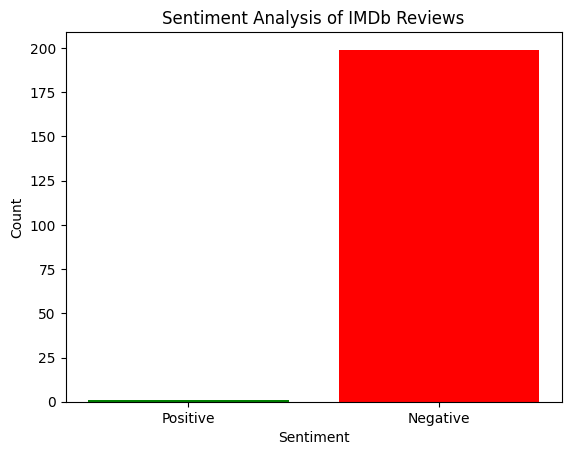

In [13]:
positive_sentiments = sentiments.count(1)
negative_sentiments = sentiments.count(0)

labels = ['Positive', 'Negative']
counts = [positive_sentiments, negative_sentiments]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis of IMDb Reviews')
plt.show()